# Reshaping Exercises

Before diving into actually doing some exercises, a few notes about reshaping in `pandas`. 

**So many tools:** As is so often the case with `pandas`, when there are multiple ways that something can be done, `pandas` implements all of them, even it if results in a lot of duplication of funcationality. As a result, there are several sets of methods that do very similar things, and which can be hard to keep straights: 

- `melt` and `pivot`: Tools for moving a dataset from long-to-wide (`pivot`) or wide-to-long (`melt`).
- `pivot_table`: Like `pivot`, but allows you to do aggregations during the reshape if you want.
- `stack` and `unstack`: Like `melt` and `pivot`, but only for use when your variables are stored in indices. I don't use these much. 

Personally, **I find melt and pivot most useful.** `pivot_table` *can* do aggregations during the reshape, but you can always do aggregations yourself using `groupby`. :) 

Also, I have to go look at [these pictures](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html)... every time I reshape. Don't hesistate to look them up for help!

**What SHOULD I want my data to look like?** Just a reminder that a natural question to ask is "in what format should I want my data?" Obviously this question is subjective, but as you read in the Hadley Wickham [piece I assigned](http://vita.had.co.nz/papers/tidy-data.html), this is a good standard definition for a "tidy" dataset to which we might aspire: 

1. Each variable forms a column.
2. Each observation forms a row.
3. Each type of observational unit forms a table.

In general, I'm a big fan of this approach, and I think it's a good one to use (especially numbers 1 and 2).

Note that the question of what forms an "observation" depends on the analysis you plan to run (which depends on the answer you seek to ask! See! EVERYTHING ALWAYS COMES BACK TO THE QUESTION YOU ARE SEEKING TO ANSWER!). Suppose you have data on GDP from different countries for many years. If you plan to run a panel analysis where each observation is a country-year, then each row should be a country-year. But if you plan to do a country-level analysis using measures of, say, GDP variation over time, then each row should be a country!


In [152]:
import pandas as pd
import numpy as np

pd.set_option("mode.copy_on_write", True)

# Create a results dictionary
results = {}


## Exercises!

So in this exercise, we're going to work with data from the World Development Indicators. Unlike in previous exercises, however, where I cleaned up the data before giving it to you, we'll be working with the raw data just as you would get it from the World Bank download site. 


## Gradescope Autograding

Please follow [all standard guidance](https://www.practicaldatascience.org/html/autograder_guidelines.html) for submitting this assignment to the Gradescope autograder, including storing your solutions in a dictionary called `results` and ensuring your notebook runs from the start to completion without any errors.

For this assignment, please name your file `exercise_reshaping.ipynb` before uploading.

You can check that you have answers for all questions in your `results` dictionary with this code:

```python
assert set(results.keys()) == {
    "ex2_num_rows",
    "ex4_num_rows",
    "ex5_num_countries",
    "ex6_relationship",
    "ex7_relationship",
    "ex8_countries_in_panel",
    "ex10_demeaned_corr",
}
```


### Submission Limits

Please remember that you are **only allowed three submissions to the autograder.** Your last submission (if you submit 3 or fewer times), or your third submission (if you submit more than 3 times) will determine your grade Submissions that error out will **not** count against this total.

### Exercise 1

Import the data using a link from [here](https://github.com/nickeubank/MIDS_Data/blob/master/World_Development_Indicators/raw_WDI_Data_csv.zip) and load it into pandas without unzipping it (did you know pandas will read zip files directly?!).

In [153]:
wdi = pd.read_csv(
    "https://github.com/nickeubank/MIDS_Data/raw/master/World_Development_Indicators/raw_WDI_Data_csv.zip",
    compression="zip",
)

In [154]:
# read the head of the data
wdi.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,82.368101,82.783289,83.120303,83.533457,83.897596,84.171599,84.510171,NaN,NaN,NaN
3,Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,86.007620,86.428272,87.070576,88.176836,87.342739,89.130121,89.678685,90.273687,NaN,NaN
4,Arab World,ARB,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,73.466653,73.942103,75.244104,77.162305,75.538976,78.741152,79.665635,80.749293,NaN,NaN


### Exercise 2

In this exercise, we'd like to look at the relationship between GDP and inequality across countries. So before anything else, thin down your dataset by getting only the rows related to:

- GDP per capita (in Constant US Dollars -- the "constant" means values are have been adjusted for inflation, so values from 1970 can be directly compared with 2010)
- Gini coefficient
- Information on income shares (what percentage of total income goes to X% of the income distribution). **There are 7 of these in total.**

Store the number of rows you get from this updated dataset in `"ex2_num_rows"`.

**NOTE:** this is non-trivial. This is a big dataset with LOTS of variables, so you'll have to use your data wrangling skills to see all the variables names. Remember that if you want to see all the entries in something but python compresses it (so it doesn't take up too much space), you can loop over it and print each item separately to make it show everything!

**NOTE 2:** If you _do_ print out all the variable names, please comment out the code before you submit your notebook so graders don't end up swimming in print-outs. 

In [155]:
# Print out all the column names
variables = wdi.columns
# print(variables)

In [156]:
# print out the unique values of the "Indicator Name" column
unique_values = wdi["Indicator Name"].unique()
# for i in range(0, len(unique_values)):
# print(unique_values[i])

In [157]:
# Filter the dataframe
selected_indicators = [
    "GDP per capita (constant 2010 US$)",
    "GINI index (World Bank estimate)",
    "Income share held by lowest 10%",
    "Income share held by lowest 20%",
    "Income share held by second 20%",
    "Income share held by third 20%",
    "Income share held by fourth 20%",
    "Income share held by highest 20%",
    "Income share held by highest 10%",
]

wdi_2 = wdi[wdi["Indicator Name"].isin(selected_indicators)]

wdi_2.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
520,Arab World,ARB,GDP per capita (constant 2010 US$),NY.GDP.PCAP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,5945.678558,6021.163952,6278.734889,6336.581939,6354.885748,6430.464609,6507.882895,6447.294731,6458.734486,NaN
540,Arab World,ARB,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
655,Arab World,ARB,Income share held by fourth 20%,SI.DST.04TH.20,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
656,Arab World,ARB,Income share held by highest 10%,SI.DST.10TH.10,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
657,Arab World,ARB,Income share held by highest 20%,SI.DST.05TH.20,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [158]:
ex2_num_rows = len(wdi_2)
print(f"The number of rows I get from this updated dataframe is {ex2_num_rows}.")
results["ex2_num_rows"] = ex2_num_rows

The number of rows I get from this updated dataframe is 2376.


In [159]:
# print out the unique values of the "Indicator Name" column in the new dataframe
unique_values = wdi_2["Indicator Name"].unique()
# for i in range(0, len(unique_values)):
# print(unique_values[i])

### Exercise 3

OK, that makes our data a lot more manageable, but it's still pretty heinous.

In our analysis, we know that we'll want to have country-years as our units of observation, so let's start reshaping. Come up with a strategy that gets our inequality variables as columns, and makes each of our future observations (i.e. each country-year) a row. 

*Hint:* It can sometimes be helpful to drop useless columns before a reshape.

*Other hint:* Sometimes you will end up with your column names stored in a hierarchical (multi-level) `.column` object structure. As with hierarchical indices for rows, they’re a pain. (Whether this occurs depends on the exact syntax you use, so you may or may not get it).

The two easy ways to fix these hierarchical `.column` objects are:

- Just drop a level: df.columns.drop_level(0)` where 0 is which level you want to drop.
- Directly manipulate the column names by doing something to the df.columns object and re-assigning to df.columns. For example, you can just concatenate two columns levels (they're stored as tuples) with a dash between them with `df.columns = map(lambda x: str(x[0]) + "-" + str(x[1]), df.columns)`.

In [160]:
import pandas as pd

# Drop unnecessary columns
columns_to_drop = ["Country Code", "Indicator Code", "Unnamed: 63"]
wdi_2 = wdi_2.drop(columns=columns_to_drop)

# Melt the DataFrame to get 'Year' as a column
wdi_2_melted = wdi_2.melt(
    id_vars=["Country Name", "Indicator Name"], var_name="Year", value_name="Value"
)

wdi_2_melted

,Country Name,Indicator Name,Year,Value
0,Arab World,GDP per capita (constant 2010 US$),1960,NaN
1,Arab World,GINI index (World Bank estimate),1960,NaN
2,Arab World,Income share held by fourth 20%,1960,NaN
3,Arab World,Income share held by highest 10%,1960,NaN
4,Arab World,Income share held by highest 20%,1960,NaN
...,...,...,...,...
140179,Zimbabwe,Income share held by highest 20%,2018,NaN
140180,Zimbabwe,Income share held by lowest 10%,2018,NaN
140181,Zimbabwe,Income share held by lowest 20%,2018,NaN
140182,Zimbabwe,Income share held by second 20%,2018,NaN


In [161]:
# Now pivot the table to get each indicator as a column
wdi_2_pivot = wdi_2_melted.pivot(
    index=["Country Name", "Year"], columns="Indicator Name", values="Value"
)

# Reset index to make 'Country Name' and 'Year' into columns
wdi_2_pivot.reset_index(inplace=True)

# Show the first few rows of the reshaped DataFrame
wdi_2_pivot.head()

Indicator Name,Country Name,Year,GDP per capita (constant 2010 US$),GINI index (World Bank estimate),Income share held by fourth 20%,Income share held by highest 10%,Income share held by highest 20%,Income share held by lowest 10%,Income share held by lowest 20%,Income share held by second 20%,Income share held by third 20%
0,Afghanistan,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Exercise 4

Now that you've done your reshapes, subset for observations that are post-1980. Store the number of rows in your reshaped data with only data from the years after 1980 in `"ex4_num_rows"`.

In [162]:
# convert the "Year" column to integer
wdi_2_pivot["Year"] = wdi_2_pivot["Year"].astype(str).astype(int)

In [163]:
# subset for observations that are post-1980
post_1980 = wdi_2_pivot[wdi_2_pivot["Year"] > 1980]

post_1980.head()

Indicator Name,Country Name,Year,GDP per capita (constant 2010 US$),GINI index (World Bank estimate),Income share held by fourth 20%,Income share held by highest 10%,Income share held by highest 20%,Income share held by lowest 10%,Income share held by lowest 20%,Income share held by second 20%,Income share held by third 20%
21,Afghanistan,1981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,Afghanistan,1982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,Afghanistan,1983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,Afghanistan,1984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,Afghanistan,1985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [164]:
ex4_num_rows = post_1980.shape[0]
print(f"The number of rows is {ex4_num_rows}.")
results["ex4_num_rows"] = ex4_num_rows

The number of rows is 10032.


### Exercise 5

Subset for observations for which we have GINI index estimates. How many unique *countries* do you end up with? Store this answer in `ex5_num_countries`.

In [165]:
# subset for observations that have a non-null value for the GINI index
post_1980_Gini = post_1980[post_1980["GINI index (World Bank estimate)"].notnull()]

post_1980_Gini.head()

Indicator Name,Country Name,Year,GDP per capita (constant 2010 US$),GINI index (World Bank estimate),Income share held by fourth 20%,Income share held by highest 10%,Income share held by highest 20%,Income share held by lowest 10%,Income share held by lowest 20%,Income share held by second 20%,Income share held by third 20%
95,Albania,1996,1869.871270,27.0,23.3,21.2,36.1,3.9,9.2,13.7,17.7
101,Albania,2002,2572.728858,31.7,22.2,25.4,40.4,3.5,8.4,12.6,16.5
104,Albania,2005,3062.682723,30.6,22.5,24.3,39.2,3.5,8.4,12.9,17.0
107,Albania,2008,3775.592212,30.0,22.2,24.5,39.0,3.7,8.9,13.1,16.8
111,Albania,2012,4276.620248,29.0,22.8,22.9,37.8,3.7,8.9,13.2,17.3


In [166]:
ex5_num_countries = post_1980_Gini["Country Name"].nunique()

print("Number of unique countries with GINI index estimates:", ex5_num_countries)
results["ex5_num_countries"] = ex5_num_countries

Number of unique countries with GINI index estimates: 164


### Exercise 6

Plot the relationship between **log** GDP per capita and Gini scores for all country years and add a linear fit as well. Is higher inequality associated with higher log GDP? Store your answer (as `"yes"` or `"no"`) in `results` under the key `"ex6_relationship"`.

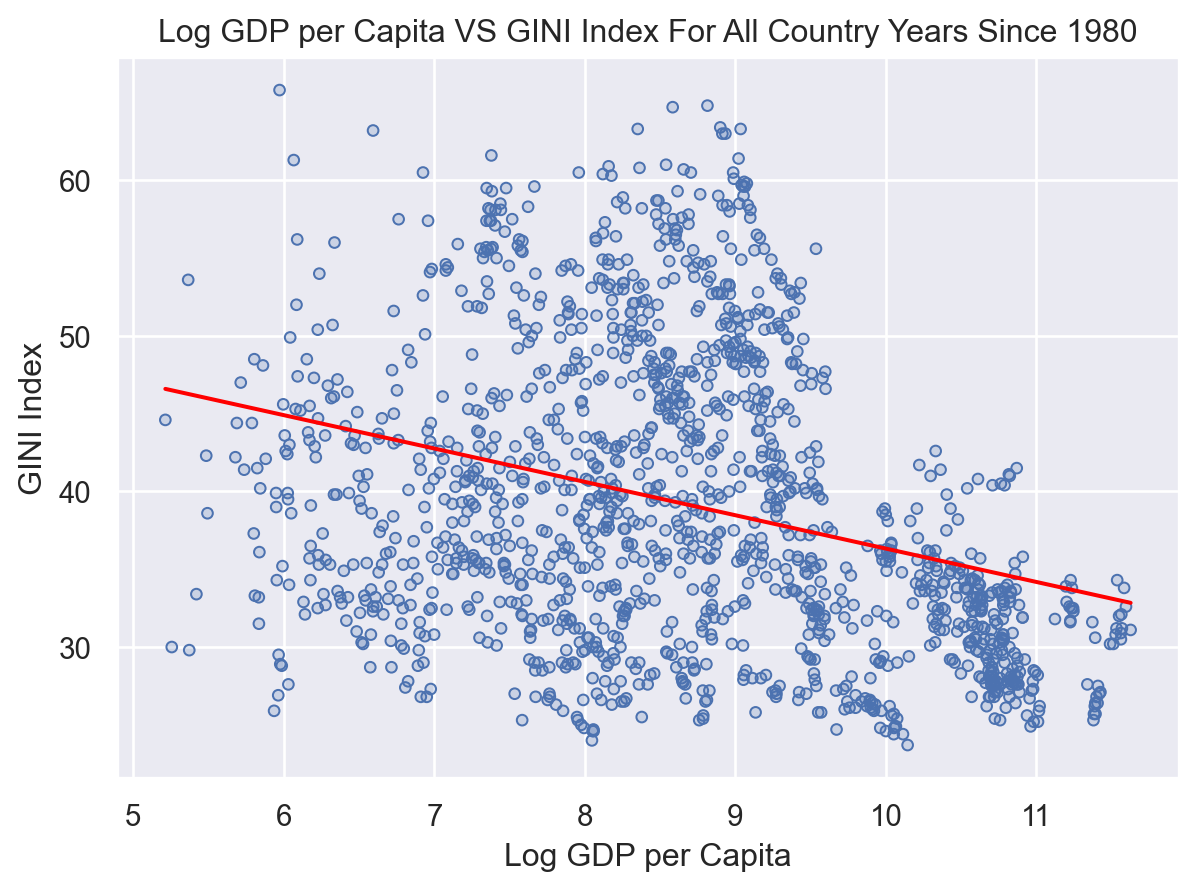

In [167]:
import seaborn as sns
import seaborn.objects as so

import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

import matplotlib.pyplot as plt

post_1980_Gini["Log GDP per Capita"] = np.log(
    post_1980_Gini["GDP per capita (constant 2010 US$)"]
)

(
    so.Plot(
        post_1980_Gini, x="Log GDP per Capita", y="GINI index (World Bank estimate)"
    )
    .add(so.Dots())
    .add(so.Line(color="red"), so.PolyFit(order=1))
    .label(
        x="Log GDP per Capita",
        y="GINI Index",
        title="Log GDP per Capita VS GINI Index For All Country Years Since 1980",
    )
)

> From the graph, it shows that higher inequality is not associated with higher log GDP. As Log GDP per Capita increases, GINI Index decreases. 

In [168]:
ex6_relationship = "no"
results["ex6_relationship"] = ex6_relationship
print("Higher inequality is not associated with higher log GDP.")

Higher inequality is not associated with higher log GDP.


### Exercise 7

It's important to not always rely too much on a single measure of something like inequality. To check the robustness of our result, let's be sure to also look at the relationship between inequality and income by using the income share of the richest 10% instead of just the Gini coefficient. Plot that relationship.

Do you also find that income inequality (as measured by the share of income accruing to the top 10% of earners) is positively or negatively correlated with gdp per capita? Store your answer in your `results` dict under the key `"ex7_relationship"` as the string `"positively correlated"` or the string `"negatively correlated"`.

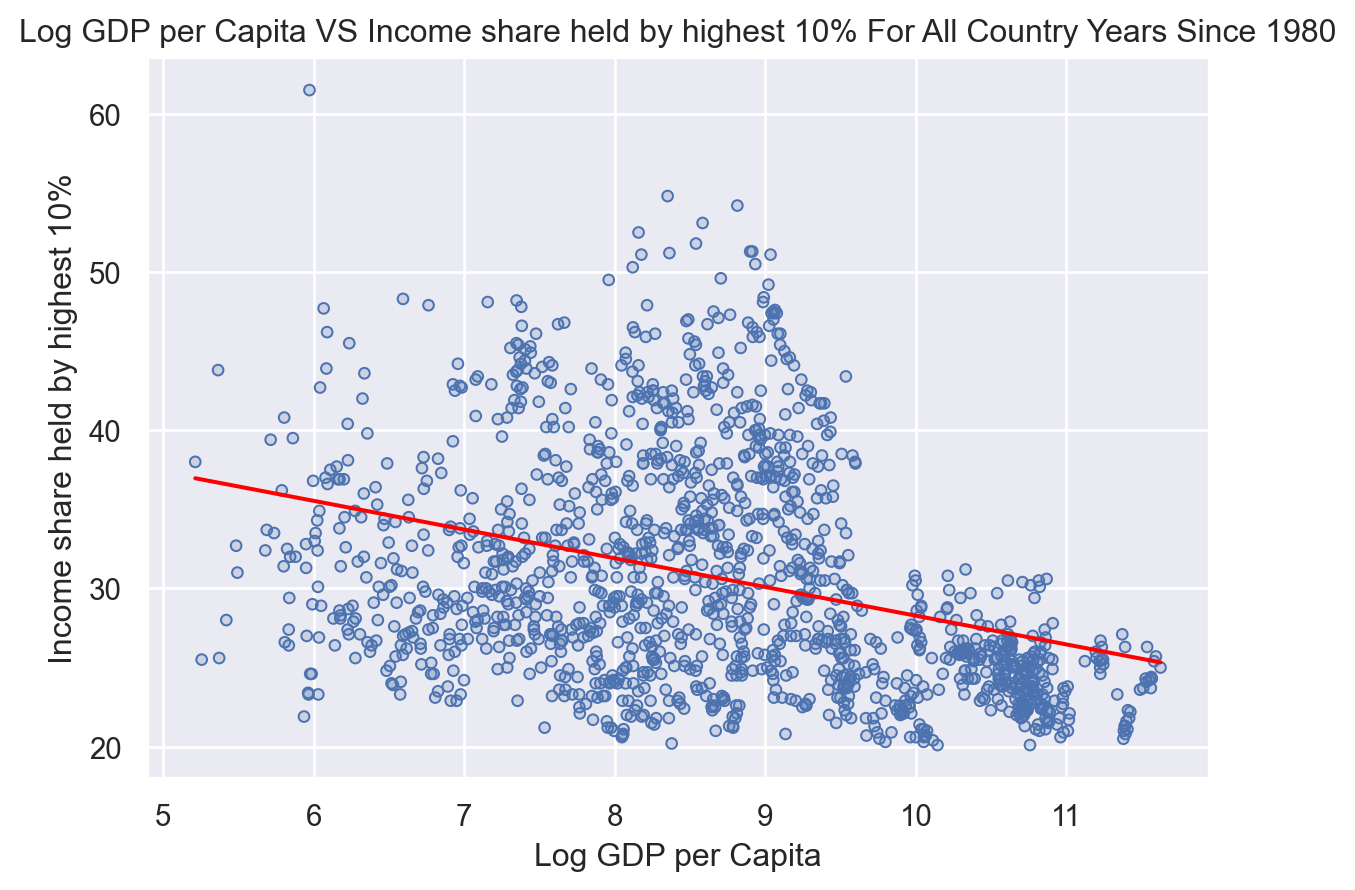

In [169]:
(
    so.Plot(
        post_1980_Gini, x="Log GDP per Capita", y="Income share held by highest 10%"
    )
    .add(so.Dots())
    .add(so.Line(color="red"), so.PolyFit(order=1))
    .label(
        x="Log GDP per Capita",
        y="Income share held by highest 10%",
        title="Log GDP per Capita VS Income share held by highest 10% For All Country Years Since 1980",
    )
)

> From the graph, it shows that income inequality (as measured by the share of income accruing to the top 10% of earners) is negatively correlated with gdp per capita. As log GDP per Capita increases, income inequality decreases. 

In [170]:
ex7_relationship = "negatively correlated"
results["ex7_relationship"] = ex7_relationship
print("Income inequality is negatively correlated with gdp per capita.")

Income inequality is negatively correlated with gdp per capita.


### Exercise 8

This analysis has allowed us to evaluate whether richer countries tend to have greater income inequality, but it certainly has not established whether we should expect that as countries become wealthier, their income distribution will also become more even. In other words, we have established a correlation between income inequality and wealth, but we certainly have not established a causal relationship between wealth and income inequality.

One way we might be able to get better traction on this question is to look at whether, as individual countries become wealthier, their income distribution also becomes more even.

To answer this question, let's begin by subsetting our data to the years 2005 to 2015 (inclusive)—the period in which the largest number of countries in our data have inequality data. Then also subset for the set of countries with Gini data for all years in this period. This gives us what's called a *balanced panel*—a dataset in which we have data on entities *at a number of different points in time* (a panel dataset) and where at every point in time, we have data for the *same set of entities* (a balanced panel dataset). 

Balanced panels are very desirable because the fact that they contain the same entities at all moments in time means that any changes we measure over time are the result of real changes in the outcomes we care about and *not* the result of changes in the composition of our sample.

Store the number of countries still in your data in `"ex8_countries_in_panel"`.

In [171]:
# subset for observations that are between 2005 and 2015
post_1980_Gini_balanced = post_1980_Gini[
    (post_1980_Gini["Year"] >= 2005) & (post_1980_Gini["Year"] <= 2015)
]

post_1980_Gini_balanced.head()

Indicator Name,Country Name,Year,GDP per capita (constant 2010 US$),GINI index (World Bank estimate),Income share held by fourth 20%,Income share held by highest 10%,Income share held by highest 20%,Income share held by lowest 10%,Income share held by lowest 20%,Income share held by second 20%,Income share held by third 20%,Log GDP per Capita
104,Albania,2005,3062.682723,30.6,22.5,24.3,39.2,3.5,8.4,12.9,17.0,8.027047
107,Albania,2008,3775.592212,30.0,22.2,24.5,39.0,3.7,8.9,13.1,16.8,8.236313
111,Albania,2012,4276.620248,29.0,22.8,22.9,37.8,3.7,8.9,13.2,17.3,8.360918
169,Algeria,2011,4524.348982,27.6,22.3,22.9,37.2,4.0,9.4,13.7,17.5,8.417229
343,Angola,2008,3652.153498,42.7,21.9,32.3,48.5,2.1,5.4,9.6,14.5,8.203072


In [172]:
# count the number of GINI Index observations for each country
country_unique_post_1980_Gini_balanced = post_1980_Gini_balanced.groupby(
    "Country Name"
)["GINI index (World Bank estimate)"].count()

country_unique_post_1980_Gini_balanced.head()

Country Name
Albania       3
Algeria       1
Angola        1
Argentina    10
Armenia      11
Name: GINI index (World Bank estimate), dtype: int64

In [173]:
# make a list of countries that have a GINI Index observation for each year between 2005 and 2015
country_years = 2015 - 2005 + 1
country_list = country_unique_post_1980_Gini_balanced[
    country_unique_post_1980_Gini_balanced == country_years
].index.tolist()
# print(country_list)

In [174]:
# subset for countries that have a GINI Index observation for each year between 2005 and 2015
post_1980_Gini_balanced = post_1980_Gini_balanced[
    post_1980_Gini_balanced["Country Name"].isin(country_list)
]
ex8_countries_in_panel = post_1980_Gini_balanced["Country Name"].nunique()
results["ex8_countries_in_panel"] = ex8_countries_in_panel
print(f"The number of remaining countries in my data is {ex8_countries_in_panel }.")

The number of remaining countries in my data is 42.


### Exercise 9

Now, demean both Gini coefficient scores and log GDP per capita for all countries. In other words, for each country, calculate that country's average Gini score over this period and subtract that average from all of the country's Gini scores, then do the same for log GDP per capita. Then plot these countries' *demeaned* Gini scores against demeaned log GDP per capita.

Essentially, this is a way of looking at whether, when countries are richer than their average during this period, they have more equal income distributions than on average.

In [175]:
# Group the filtered DataFrame by 'Country' and calculate the average Gini index
average_gini_scores = (
    post_1980_Gini_balanced.groupby("Country Name")["GINI index (World Bank estimate)"]
    .mean()
    .reset_index()
)

In [176]:
# Group the filtered DataFrame by 'Country' and calculate the average log GDP per capita
average_Log_GDP = (
    post_1980_Gini_balanced.groupby("Country Name")["Log GDP per Capita"]
    .mean()
    .reset_index()
)

In [177]:
# Merge the two DataFrames to get the average Gini index and average log GDP per capita for each country
average_post_1980_Gini_balanced = pd.merge(
    average_gini_scores, average_Log_GDP, on="Country Name"
).rename(
    columns={
        "GINI index (World Bank estimate)": "Average Gini Index (World Bank estimate)",
        "Log GDP per Capita": "Average Log GDP per Capita",
    }
)

average_post_1980_Gini_balanced.head()

,Country Name,Average Gini Index (World Bank estimate),Average Log GDP per Capita
0,Armenia,30.690909,8.121420
1,Austria,30.381818,10.761425
2,Belarus,27.518182,8.673368
3,Belgium,28.272727,10.699702
4,Costa Rica,48.845455,9.006897


In [178]:
# Merge the DataFrames with the average Gini index and average log GDP per capita for each country with the main DataFrame
demeaned_post_1980_Gini_balanced = pd.merge(
    post_1980_Gini_balanced, average_post_1980_Gini_balanced, on="Country Name"
)

demeaned_post_1980_Gini_balanced.head()

,Country Name,Year,GDP per capita (constant 2010 US$),GINI index (World Bank estimate),Income share held by fourth 20%,Income share held by highest 10%,Income share held by highest 20%,Income share held by lowest 10%,Income share held by lowest 20%,Income share held by second 20%,Income share held by third 20%,Log GDP per Capita,Average Gini Index (World Bank estimate),Average Log GDP per Capita
0,Armenia,2005,2571.977128,36.0,20.2,30.8,44.7,3.3,8.1,11.8,15.2,7.852430,30.690909,8.12142
1,Armenia,2006,2934.024882,29.7,22.1,24.5,38.8,3.7,8.9,13.1,17.0,7.984130,30.690909,8.12142
2,Armenia,2007,3366.664939,31.2,22.1,25.1,40.0,3.5,8.4,12.8,16.7,8.121678,30.690909,8.12142
3,Armenia,2008,3629.909091,29.2,22.4,23.7,38.4,3.9,9.1,13.1,17.0,8.196963,30.690909,8.12142
4,Armenia,2009,3137.346098,28.0,22.4,22.9,37.5,4.0,9.4,13.5,17.2,8.051133,30.690909,8.12142


In [179]:
# Create a new column for the demeaned Gini index
demeaned_post_1980_Gini_balanced["Demeaned GINI index (World Bank estimate)"] = (
    demeaned_post_1980_Gini_balanced["GINI index (World Bank estimate)"]
    - demeaned_post_1980_Gini_balanced["Average Gini Index (World Bank estimate)"]
)

# Create a new column for the demeaned log GDP per capita
demeaned_post_1980_Gini_balanced["Demeaned Log GDP per Capita"] = (
    demeaned_post_1980_Gini_balanced["Log GDP per Capita"]
    - demeaned_post_1980_Gini_balanced["Average Log GDP per Capita"]
)

demeaned_post_1980_Gini_balanced.head()

,Country Name,Year,GDP per capita (constant 2010 US$),GINI index (World Bank estimate),Income share held by fourth 20%,Income share held by highest 10%,Income share held by highest 20%,Income share held by lowest 10%,Income share held by lowest 20%,Income share held by second 20%,Income share held by third 20%,Log GDP per Capita,Average Gini Index (World Bank estimate),Average Log GDP per Capita,Demeaned GINI index (World Bank estimate),Demeaned Log GDP per Capita
0,Armenia,2005,2571.977128,36.0,20.2,30.8,44.7,3.3,8.1,11.8,15.2,7.852430,30.690909,8.12142,5.309091,-0.268989
1,Armenia,2006,2934.024882,29.7,22.1,24.5,38.8,3.7,8.9,13.1,17.0,7.984130,30.690909,8.12142,-0.990909,-0.137289
2,Armenia,2007,3366.664939,31.2,22.1,25.1,40.0,3.5,8.4,12.8,16.7,8.121678,30.690909,8.12142,0.509091,0.000258
3,Armenia,2008,3629.909091,29.2,22.4,23.7,38.4,3.9,9.1,13.1,17.0,8.196963,30.690909,8.12142,-1.490909,0.075543
4,Armenia,2009,3137.346098,28.0,22.4,22.9,37.5,4.0,9.4,13.5,17.2,8.051133,30.690909,8.12142,-2.690909,-0.070287


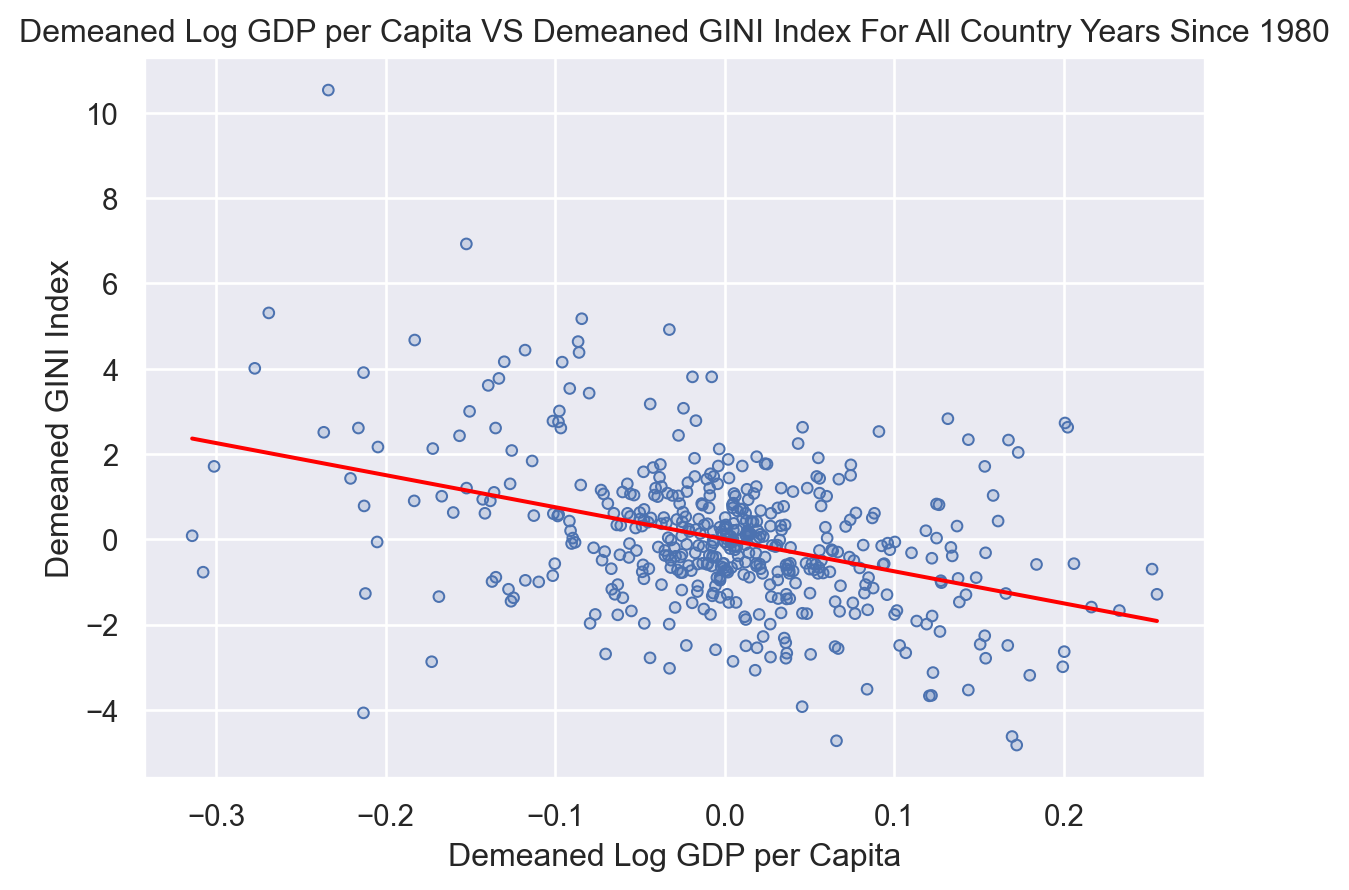

In [180]:
(
    so.Plot(
        demeaned_post_1980_Gini_balanced,
        x="Demeaned Log GDP per Capita",
        y="Demeaned GINI index (World Bank estimate)",
    )
    .add(so.Dots())
    .add(so.Line(color="red"), so.PolyFit(order=1))
    .label(
        x="Demeaned Log GDP per Capita",
        y="Demeaned GINI Index",
        title="Demeaned Log GDP per Capita VS Demeaned GINI Index For All Country Years Since 1980",
    )
)

> From the graph, it shows that when countries are richer than their average during this period, they have more equal income distributions than on average. As demeaned log GDP per Capita increases, demeaned Gini index decreases.

### Exercise 10 

Calculate the correlation between these two demand outcomes in our balanced panel and store the result in `"ex10_demeaned_corr"`.

In [181]:
ex10_demeaned_corr = demeaned_post_1980_Gini_balanced[
    "Demeaned Log GDP per Capita"
].corr(demeaned_post_1980_Gini_balanced["Demeaned GINI index (World Bank estimate)"])
results["ex10_demeaned_corr"] = ex10_demeaned_corr
print(
    f"The correlation between these two demeaned outcomes is around {ex10_demeaned_corr:.2f}."
)

The correlation between these two demeaned outcomes is around -0.39.


In [182]:
assert set(results.keys()) == {
    "ex2_num_rows",
    "ex4_num_rows",
    "ex5_num_countries",
    "ex6_relationship",
    "ex7_relationship",
    "ex8_countries_in_panel",
    "ex10_demeaned_corr",
}
# print(results)